# Data Preparation and Machine Learning on shill bidding 

<h3 style="color:blue"> problem statement:</h3>

shill bidding dataset of eBay is given we have to classify bids as normal or abnormal using data preparation and Machine Learning Techniques

<h3 style='color:blue'>Findings of dataset:</h3>

This dataset can be found on UCI Machine Learning Repository. <br>
<a href="https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset">shill Bidding Dataset link </a>

# Data Preparation part

##### importing libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Numpy is used for to appling stats,Pandas is used for data crunching and matplotlib and seaborn are used for data visulization.

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

sklearn is used for following Machine Learning and Data Preparation opeartions: <br>   
● standard scalling(Feature scalling)<br>
● Principal Component Analysis (PCA)<br>
● Linear Discriminant Analysis (LDA)<br>
● Train Test splitting <br>
● Model Building of LogisticRegression,DecisionTreeClassifier,RandomForestClassifier and support vector machine <br>
● K_Fold cross_validation <br>
● Evaluation techniques <br>
● confusion_matrix <br>

##### importing csv file of dataset

In [33]:
train_data = pd.read_csv("Shill Bidding Dataset.csv")

In [34]:
pd.set_option('display.max_columns', None)

In [35]:
train_data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


<h3 style='color:purple'>Characterisation of the data set:</h3>

#### shape of data:

In [36]:
train_data.shape

(6321, 13)

6321 records and 13 Features are here.

Note: Records are rows and Fearures are attributes or columns

#### genral overview of features:

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


there are 6321 Non_Null values in every feature. One feature is in non_numerical form all other features are in numerical form.

#### checking missing or null values

In [38]:
train_data.isnull().sum()

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

There are no missing values in any feature.

<h3 style='color:blue'>Data Cleaning:</h3>

Data Cleaning is used for following things:  <br>
● To remove null values.<br>
● To fill null values.<br>
● To remove outliers.<br>
● To remove or modify data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted..

As there are no null values or any unwanted values so it is not needed to do data cleaning.

---

<h3 style='color:purple'>Exploratory Data Analysis(EDA):</h3>

Exploratory Data Analysis(EDA) is process of taking insights from the data.It is used to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques

#### extracting features with less categories

As features with less categories are used to do qualitative analysis so it is needed to extarct features with less categories.

In [39]:
train_data.columns

Index(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class'],
      dtype='object')

In [40]:
for feature in train_data.columns:
    if len(train_data[feature].unique())<10:
        print(feature)
        print(train_data[feature].unique())      

Successive_Outbidding
[0.  1.  0.5]
Auction_Duration
[ 5  7  1  3 10]
Class
[0 1]


here are three features which have categories less than 10 and categories are also shown.

#### barcharts of value counts

Here I am interested to know about most occured category so selected three categorical features then I plotted value counts on bar charts.

Value counts of Successive_Outbidding


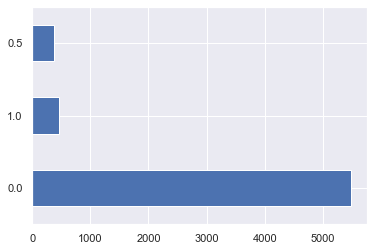

Value counts of Auction_Duration


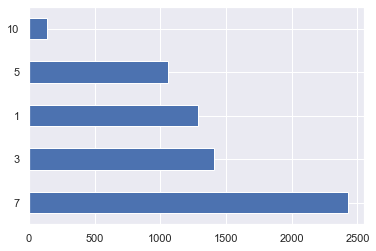

Value counts of Class


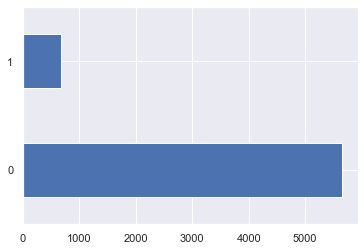

In [41]:
catag_features=['Successive_Outbidding','Auction_Duration','Class']
for feature in catag_features:
    print(f'Value counts of {feature}')
    train_data[feature].value_counts().plot(kind='barh')
    plt.show()

##### Results: <br>
● The most occuring Successive_Outbidding is zero(0).<br>
● The most occuring Auction_Duration is 7 hours.<br>
● The most occuring Class is zero (normal bid).<br>

#### extracting Quantitave features

As i wanted to know about how values in quantitave features are distributed so that is why I extracted Quantitave features.

Quantitative features are numerical features.Quantitative features have contineous values.
so here I selected numerical features with more than 10 categories because less than 10 categories are qualitative features.

In [42]:
quant_features=[feature for feature in train_data.columns if train_data[feature].dtype!='O' and 
                len(train_data[feature].unique())>10 ]
quant_features

['Record_ID',
 'Auction_ID',
 'Bidder_Tendency',
 'Bidding_Ratio',
 'Last_Bidding',
 'Auction_Bids',
 'Starting_Price_Average',
 'Early_Bidding',
 'Winning_Ratio']

In [43]:
len(quant_features)

9

there are nine quantitative features.

##### Using histograms to show distributions of values in quantitave features 

here I am interested to know about which type of distribution of values in a quantitave feature.so I ignored first two Id containing features as these are used for unique identification.

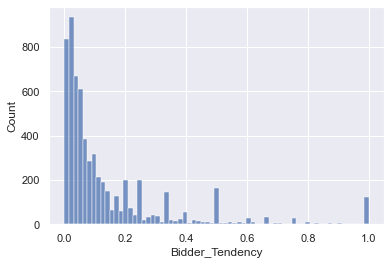

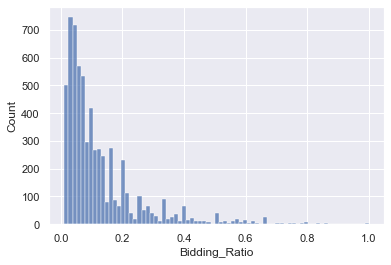

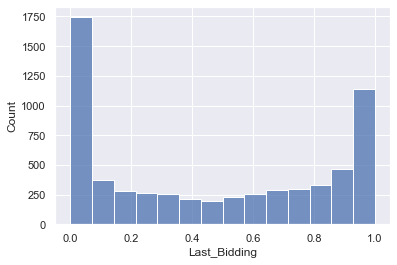

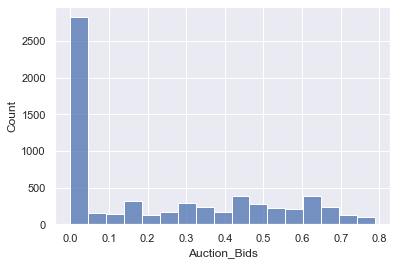

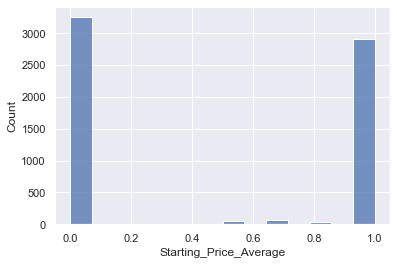

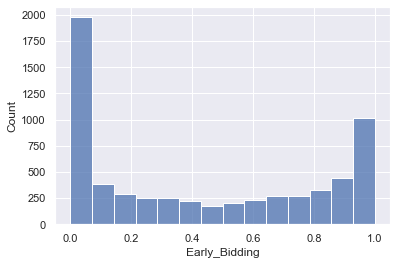

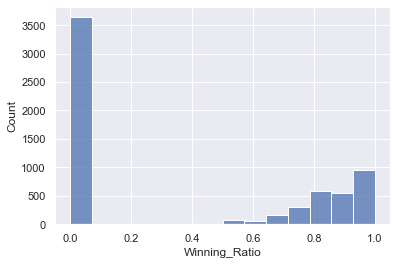

In [44]:
for feature in quant_features[2:]:
    sns.histplot(train_data[feature])
    plt.show()

##### Results:<br>
● In Bidder_Tendency most of bids are performed between 0.0 and 0.2 Bidder_Tendency so this is left skewed<br>
● In Bidding Ratio most of bids are performed between 0.0 and 0.2 Bidding Ratio .this is also left skewed<br>
● In Last Bidding most of bids are performed between 0.0 and 0.1 Last Bidding.This is also skewed to left and right.<br>
● In Auction_Bids most of bids are performed between 0.0 and 0.1 Auction_Bids.this is also left skewed<br>
● In Starting_Price_Average most of bids are performed at 0.0 and 1.0 Starting_Price_Average.This is also skewed to left and right.<br>
● In Early_bidding the most occuring Early Bidding is 0 and 1. This is also skewed to left and right.<br>
● In Winning Ratio the most occuring Winning Ratio is 0.this is also left skewed<br>

##### showing correlation of features using heatmap

Here I am interested to know about what type of relationship A feature have with another feature.<br>
so that is why heatmap is used to show score of correlation of every feature with each other .

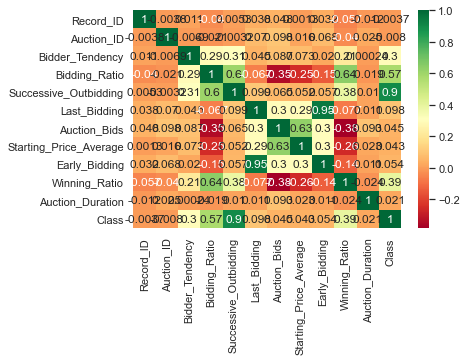

In [45]:
# Finds correlation between Independent and dependent attributes
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

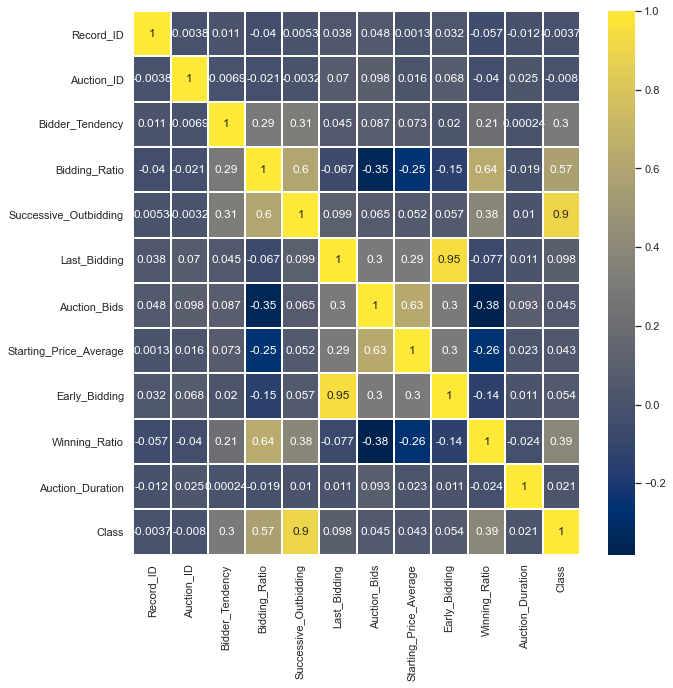

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(),cmap ='cividis',linewidth = 0.30, annot = True)
plt.show()

By Looking on correlation it is analysed that how much relative and important a feature is with respect to target feature .

#### results:  <br>
● Successive_Outbidding and winning ration has strongly related with Class of bids tends to (1) anomalous bids.<br>
● Auction_Duration has negative relation tends towards zero (normal bids)

---

<h3 style='color:blue'>One hot encoding:</h3>

here I am interested to convert non_numerical features into numerical because it is must for a feature to be numerical so it can be used in machine learning process.
That is why one hot encoding is used.

one hot encoding is method which is used to convert non numerical feature into numerical feature

#### extarcting non numerical feature

As I wanted to convert non numerical feature into categorical so that is why non numerical feature is extracted.

In [47]:
non_numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O']
non_numerical_features

['Bidder_ID']

Here is only one non numerical feature that is Bidder_ID but it is not needed in machine learning so one hot encoding is not needed here.

*****

<h3 style='color:purple'>Data preparation:</h3>

#### splitting dataset into dependant and independant 

As machine learning model requires two things input training data and output training data so that is why splitting is performed to devide data into output data(dependen feature) and inputs(dependant features).

In [48]:
X=train_data[['Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration']]
X

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7
...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7


Here above data is devided into dependent and Independent features. Dependant feature is output for training process and Independent features are inputs for machine learning process.

here eight features are selected as inputs.

In [49]:
y=train_data['Class']
y

0       0
1       0
2       0
3       0
4       0
       ..
6316    1
6317    0
6318    0
6319    0
6320    0
Name: Class, Length: 6321, dtype: int64

as class is target feature which is used as dependant feature(output).

<h3 style='color:blue'>Feature Scaling:</h3>

As I wanted to normalized inputs values around a scale so that is why feature scalling is used.

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

Standardization is scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.91570792e-01,  2.07063786e+00, -3.71076191e-01, ...,
        -1.13105468e+00,  6.84785358e-01,  1.56058278e-01],
       [-5.99541854e-01,  5.49956797e-01, -3.71076191e-01, ...,
        -1.09666273e+00,  1.32110381e+00,  1.56058278e-01],
       [ 1.60556670e-03,  5.49956797e-01, -3.71076191e-01, ...,
        -1.12313912e+00,  1.44836750e+00,  1.56058278e-01],
       ...,
       [-4.41396861e-01, -6.40141428e-01, -3.71076191e-01, ...,
        -1.08999087e+00, -8.42378931e-01,  9.66945555e-01],
       [-3.32969695e-01, -3.09558586e-01, -3.71076191e-01, ...,
        -1.13003766e+00, -8.42378931e-01,  9.66945555e-01],
       [-6.40120753e-01, -6.40141428e-01, -3.71076191e-01, ...,
        -2.37244453e-01, -8.42378931e-01,  9.66945555e-01]])

<h3 style='color:blue'>dimensional reduction:</h3>

Here I am interested to reduce inputs so that is why dimentional reduction technique used.

Dimensionality reduction refers to techniques for reducing the number of input variables in training data. When dealing with high dimensional data, it is often useful to reduce the dimensionality by reducing features. <br>
It has two main techniques: <br>
● Principal Component Analysis (PCA) <br>
● Linear Discriminant Analysis (LDA) <br>

In [51]:
X.columns

Index(['Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding',
       'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average',
       'Early_Bidding', 'Winning_Ratio', 'Auction_Duration'],
      dtype='object')

In [52]:
len(X.columns)

9

Threre are 9 feature as inputs.

#### Principal Component Analysis (PCA)

Principal Component Analysis, or PCA, is a dimensionality-reduction method to find lower-dimensional space by preserving the variance as measured in the high dimensional input space. It is an unsupervised method for dimensionality reduction.

In [53]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(6321, 6)

Here above number of features are reduced to 6 .which makes 90 % importance to Model.

##### variance  of features

In [54]:
pca.explained_variance_ratio_

array([0.30739291, 0.23382242, 0.13848929, 0.11021484, 0.08177317,
       0.05702722])

#### visulizing PCA

Text(0, 0.5, 'Second Principal Component')

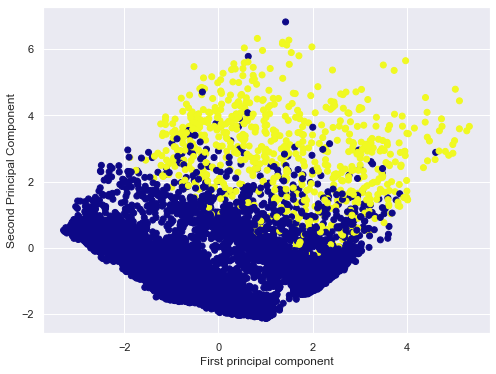

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

as two classes are clear here

#### Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis is a linear model for classification and dimensionality reduction.  Most commonly used for feature extraction in pattern classification problems.

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_LDA = lda.fit_transform(X,y)
X_LDA.shape

(6321, 1)

LDA allowed for only one parameter 

In [57]:
lda.explained_variance_ratio_

array([1.])

As there is only one attribute so we can not visulize LDA.

### difference of PCA and LDA:

###### Principal Component Analysis(PCA): <br>
Principal Component Analysis(PCA) is a commonly used unsupervised linear transformation technique.<br> PCA reduces the number of dimensions by finding the maximum variance in high dimensional data

###### Linear Discriminant Analysis(LDA) <br>
Linear Discriminant Analysis(LDA) is a supervised method that takes class labels into account when reducing the number of dimensions. The goal of LDA is to find a feature subspace that best optimizes class separability.

### predictions results using PCA

Here I am interested to know about how PCA affects machine Learning process.

Here below dataset is divided into train as test data is not used to train model.

Here logistic regression algorithim is used to predict and test results of pca_training and testing data. 

In [61]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9683794466403162

As model gives 96 % accuracy on total 6 attributes.

#### predictions results using LDA

Here I am interested to know about how LDA affects machine Learning process.

here below dataset is divided into train and test.

Logistic regression algorithim is used to predict and test results of LDA_data

In [63]:
from sklearn.model_selection import train_test_split
X_train_lda, X_test_lda, y_train, y_test = train_test_split(X_LDA, y, test_size=0.2, random_state=30)

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_lda, y_train)
model.score(X_test_lda, y_test)

0.9786561264822135

LDA testing data have accuracy of 97%.

# Machine Learning part

### Model building: <br>
This is Machine Learning Modeling part in which four types of classification algorithims are used along with hyper parameters. <br>
In this stage PCA reduced training data is given to model so in this stage classification models learns from training data.

<h3 style="color:purple">Justify the reasoning for the choice of machine learning approaches:</h3> <br>

##### Why Supervised Machine Learning is used rather than Unsepervised Machine Learning? <br>
Supervised Machine Learning is used here because with the help of supervised learning, the model can predict the output on the basis of training data.<br>
Unsepervised Machine Learning is used to view patterns or clusters <br>
As here the task is to prepare a Machine Learning Model which classify bids as normal or abnormal so Supervised Machine Learning Techniques are solution here.

##### Why Classification is used here rather than Regression? <br>
As Classification is used where dependant feature or target feature is Categorical and Regression is used Where dependant feature or target feature is Continuous <BR>
 As here target variable 'Class' contains two categories or classes which is one or zero so Classification is used here.

**************************

##### Logistic Regression Algorithim <br>
Logistic regression is one the Supervised Machine Learning technique used for classification. It is used for predicting the categorical dependent variable using a given set of independent variables. Logistic regression predicts the output of a categorical dependent variable.

In [66]:
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression(solver='lbfgs',C=0.1)
LGR.fit(X_train_pca,y_train)

LogisticRegression(C=0.1)

##### Decision Tree Algorithim <br>
The decision tree Algorithm are also comes under supervised machine learning algorithms. It can be used for both a classification problem as well as for regression problem.

In [67]:
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier(max_depth=3)
DTC.fit(X_train_pca,y_train)

DecisionTreeClassifier(max_depth=3)

##### Random Forest Algorithim <br>
Random forest is also a Supervised Machine Learning Algorithm .<br>Likewise Decision Tree Algorithim it is used widely in Classification and Regression problems.

In [68]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_features='log2',n_estimators=2)
RFC.fit(X_train_pca,y_train)

RandomForestClassifier(max_features='log2', n_estimators=2)

##### Support vector machine Algorithim(SVMs): <br> 
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

In [70]:
from sklearn.svm import SVC
Svc = SVC(kernel='linear',C=10,gamma='auto')
Svc.fit(X_train_pca,y_train)

SVC(C=10, gamma='auto', kernel='linear')

### Accuracy of classification model: <br>
As I am interested to know About How classification model performing. <br>
In the case of classification Accuracy score is  the ratio of true predictions and total predictions. <br>

<h6 style="color:green">Accuracy Score=True Predictions/Total Predictions</h6> <br>


##### Accuracy Score of Logistic Regression Model:

In [71]:
LGR.score(X_test_pca, y_test)

0.9675889328063241

accuracy of Logistic Regression Model is 96 %.

##### Accuracy Score of Decision Tree Classifier :

In [72]:
DTC.score(X_test_pca, y_test)

0.9620553359683794

accuracy of Decision Tree Classification Model is 96 %.

##### Accuracy Score of Random Forest Classifier:

In [73]:
RFC.score(X_test_pca, y_test)

0.9620553359683794

accuracy of Random Forest Classification Model is 96 %.

##### Accuracy Score of Support vector machine Model:

In [74]:
Svc.score(X_test_pca, y_test)

0.9699604743083003

accuracy of Support vector machine Model: is 97 %.

#### conclusion:<br>
Support Vector Machine is the ML Model which gives highest Accuracy. <br>
it is not finally decided that this is best performing model.<br>
So other Evaluation techniques are also used.

****************************************

### K Fold Cross validation <br>
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.
<br>
<br>
 

#### K Fold Cross validation  for model selection

##### reason:
Here I am wanted to know about Which Machine Learning Model gives us highest accuracy score.So that is why K Fold cross validation is used<br>
Here K Fold Cross validation is performed on Machine Learning Models to to find which model is performing best by giving highest accuracy.

In [78]:
from sklearn.model_selection import cross_val_score
model_scoring={}
def all_model_scores(model,X,y):
    scores=cross_val_score(model,X,y,cv=10)
    mean_score=scores.mean()
    model_scoring.update({model:mean_score})
    return model_scoring

Model_list=[DecisionTreeClassifier(),LogisticRegression(solver='lbfgs', max_iter=1000),RandomForestClassifier(),SVC()]
for model in Model_list:
    score_dict=all_model_scores(model,X_pca,y)
df_Models_scores=pd.DataFrame(score_dict,index=[0])
df_Models_scores

,DecisionTreeClassifier(),LogisticRegression(max_iter=1000),RandomForestClassifier(),SVC()
0,0.980225,0.973105,0.987027,0.988451


#### results:<br>
Decision Tree Classification,Random Forest Regression and Support Vector machine are best performing models having accuracy more than 98%.

#### K Fold Cross Validation for hyperparametes of Support Vecter Machine model <br>
###### reason:<br>
As Here I am interested to know about which hyperparametrs of Support Vector Machine model can increase accuracy of machine learning model.<br>


In [79]:
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(SVC(kernel=kval,C=cval,gamma='auto'),X,y, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.9955701205783759,
 'rbf_10': 0.9981013909040877,
 'rbf_20': 0.998259618752189,
 'linear_1': 0.9800664181718117,
 'linear_10': 0.9799081903237103,
 'linear_20': 0.9799081903237103}

#### results:

Here in support vector machine model rbf with C=20  gives us best accuracy score.

### Evalution using precision,recall and F1_score <br>
as accuracy score is not enough for the measure of the performance. So precision,recall and F1_score are used to Evaluate.

Following are commenly used techniques to evaluate classification models: <br>

#### ● precision: <br>
This refers to total number of all observations that have been predicted to belong to the positive class and are actually positive. <br>

<h6 style="color:green">precision=TP/(TP+FP)</h6> <br>

#### ● Recall <BR>
This is the proportion of observation predicted to belong to the positive class, that truly belongs to the positive class. It indirectly tells us the model’s ability to randomly identify an observation that belongs to the positive class.<BR>
<h6 style="color:green">Recall=TP/(TP+FN)</h6> <br>

#### ● F1 Score: <br>
It is Harmonic Mean of the precision and recall.This is good metric for classification.<br>
<h6 style="color:green">F1 Score=2*Precision*Recall/(Precision+Recall)</h6> <br>

<h3 style='color:purple'>Table for Machine Learning outcomes using precision,recall and F1_score </h3> <br>

As I am interested to make a Built In python function which calculates precision,recall and F1_score and then make a table of it.<br.
so this is python code whhich is used to calculate precision,recall and F1_score and then return a table

In [83]:
from sklearn import metrics

Models=[DecisionTreeClassifier(),LogisticRegression(solver='lbfgs'),RandomForestClassifier(),SVC(kernel='rbf',C=20,gamma='auto')]

Model_names=['Decision Tree Classifier','Logistic Regresion Classifier','Random Forest Classifier','Support Vecter Machine Model']

Scores=[]
Precisions=[]
Recalls=[]
F1_Scores=[]

def calculate_F1_score(x,y):
    from sklearn import metrics as mt
    return 2*mt.precision_score(x,y)*mt.recall_score(x,y)/(mt.precision_score(x,y)+mt.recall_score(x,y))

for model in Models:
    model.fit(X_train_pca,y_train)
    y_pred=model.predict(X_test_pca)
    Scores.append(model.score(X_test_pca,y_test))
    Precisions.append(metrics.accuracy_score(y_test,y_pred))
    Recalls.append(metrics.recall_score(y_test,y_pred))
    F1_Scores.append(calculate_F1_score(y_test,y_pred))
    
    
Table=pd.DataFrame(list(zip(Model_names,Scores,Precisions,Recalls,F1_Scores)),columns =['Model Name','Accuarcy Score','Precision','Recall','F1_Score'])

In [84]:
Table

,Model Name,Accuarcy Score,Precision,Recall,F1_Score
0,Decision Tree Classifier,0.980237,0.980237,0.916667,0.913495
1,Logistic Regresion Classifier,0.968379,0.968379,0.833333,0.857143
2,Random Forest Classifier,0.983399,0.983399,0.895833,0.924731
3,Support Vecter Machine Model,0.991304,0.991304,0.944444,0.961131


<h3 style='color:purple'>Reason for the choice of selection of models and hyperparametrs with justification:</h3> <br>

#### why I should choose Support Vecter Machine(SVC) model? <br>
Out of four classification Models it shown above in table that Support Vecter Machine(SVC) is best performing model with highest accuracy and F1_Score. <br>
So Support Vecter Machine(SVC) is best performing Model.

#### choice of hyperparameters: <br>
By results of cross validation applied on Support Vecter Machine(SVC) it shown that Support Vecter Machine(SVC) gives highest accuracy with hyperparameters of kernal='rbf' and C=20.

<h3 style='color:purple'> classification report to illustrate the similarities and contrast of the Machine Learning modelling outcomes.</h3>

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False

#### classification report of Logistic Regression Model

In [96]:
from sklearn.metrics import classification_report
y_pred=LGR.predict(X_test_pca)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1121
           1       0.89      0.82      0.85       144

    accuracy                           0.97      1265
   macro avg       0.93      0.90      0.92      1265
weighted avg       0.97      0.97      0.97      1265



#### classification report of Decision Tree Classification Model

In [97]:
from sklearn.metrics import classification_report
y_pred=DTC.predict(X_test_pca)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1121
           1       0.90      0.75      0.82       144

    accuracy                           0.96      1265
   macro avg       0.93      0.87      0.90      1265
weighted avg       0.96      0.96      0.96      1265



#### classification report of Random Forest Model

In [98]:
from sklearn.metrics import classification_report
y_pred=RFC.predict(X_test_pca)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1121
           1       0.94      0.72      0.81       144

    accuracy                           0.96      1265
   macro avg       0.95      0.85      0.89      1265
weighted avg       0.96      0.96      0.96      1265



#### classification report of Support Vecter Machine(SVC) Model

In [99]:
from sklearn.metrics import classification_report
y_pred=Svc.predict(X_test_pca)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1121
           1       0.87      0.86      0.87       144

    accuracy                           0.97      1265
   macro avg       0.93      0.92      0.93      1265
weighted avg       0.97      0.97      0.97      1265



<h3 style='color:black'>Reference:</h3>

***k-Fold Cross-Validation posted by Jason Brownlee in Machine Learning Mastery***<br>
https://machinelearningmastery.com/k-fold-cross-validation/#:~:text=Cross%2Dvalidation%20is%20a%20resampling,is%20to%20be%20split%20into.

**Tune Hyperparameters for Classification Machine Learning Algorithms posted by Jason Brownlee on Machine Learning Mastery** <br>
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/


**Machine Learning Model Evaluation by destoyer-byte on analyticsvidhya** <br>
https://towardsdatascience.com/various-ways-to-evaluate-a-machine-learning-models-performance-230449055f15

**Dimensionality Reduction for Machine Learning posted by Nilesh Barla on neptune.ai**<br>
https://neptune.ai/blog/dimensionality-reduction
